## 워드클라우드 (멜론)

### 1. 환경 설정 및 데이터 불러오기

In [1]:
import os
# 환경 변수 설정 # Python 프로그램이 UTF-8 인코딩을 사용하여 텍스트를 읽고 쓰도록 설정 
os.environ['PYTHONIOENCODING'] = 'utf-8' 

In [2]:
# 파일 가져오기 
import pandas as pd 
songs = pd.read_csv("../01_data_모음/melon.csv")

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5001 non-null   int64 
 1   title         5001 non-null   object
 2   artist        5001 non-null   object
 3   ganre         5001 non-null   object
 4   release_date  5001 non-null   object
 5   like_cnt      5001 non-null   int64 
 6   lylics        5001 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [4]:
# 환경세팅 

import numpy as np
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import matplotlib.font_manager as fm
from konlpy.tag import Okt
from konlpy.tag import Komoran
from wordcloud import WordCloud
from collections import Counter
import re 

### 2. 형태소 분석 

In [5]:
# 불용어 
stopwords=[]

In [6]:
# 형태소 분석기 (okt) pos 출력
from konlpy.tag import Okt  
okt = Okt()

#### 명사 기준 

In [7]:
# 문장의 "Noun" 인 리스트만 반환하는 함수 (okt 사용)
def collect_review (review) :
  pos_review = okt.pos(review)
  rt_noun_list = list()
  for word, pos in pos_review :
    if len(word) == 1 or word in stopwords :
      continue
    # if pos in ['Noun', "Verb", "Adjective"] :
    if pos in ['Noun'] :
      rt_noun_list.append(word)
  return rt_noun_list

In [8]:
# 문장마다 정규표현식을 적용하는 함수
def regular_review (review) :
  rt_review = re.sub("[^0-9a-zA-zㄱ-ㅎ가-힣\s+]","",review)
  return rt_review

In [9]:
import re
# 형태소 리스트화
new_posdt = songs["lylics"].tolist()
pos_word_list = list()

for i in new_posdt:
  pos_word_list.extend(collect_review(regular_review(i)))

In [10]:
print(len(pos_word_list), pos_word_list[:5])

154643 ['미움', '모습', '보고', '그때', '조금']


In [11]:
# 카운터 확인
pos_counter = Counter(pos_word_list)
pos_counter_most = pos_counter.most_common(50)
print(pos_counter)

Counter({'우리': 3301, '기억': 3104, '마음': 2902, '사랑': 2900, '시간': 2502, '이제': 2500, '다시': 2301, '생각': 1900, '엄마': 1900, '노래': 1700, '우린': 1400, '아무': 1400, '당신': 1400, '바보': 1400, '모습': 1303, '이야기': 1300, '매일': 1300, '그때': 1204, '그대': 1202, '하루': 1200, '지금': 1200, '멀리': 1200, '아버지': 1200, '모두': 1002, '처음': 1000, '그냥': 1000, '세상': 1000, '언제': 1000, '오늘': 900, '바람': 900, '모든': 900, '해도': 900, '보고': 801, '항상': 800, '아마': 800, '시작': 800, '새끼': 800, '새벽': 800, '만큼': 800, '계절': 701, '가장': 700, '서로': 700, '얘기': 700, '이름': 700, '추억': 700, '전부': 700, '정말': 600, '사이': 600, '내일': 600, '서서히': 600, '발걸음': 600, '마주': 600, '풍경': 600, '가끔': 600, '순간': 600, '저녁': 600, '눈물': 600, '하나': 600, '자리': 600, '잠깐': 600, '조금': 503, '가득': 501, '이건': 500, '어디': 500, '하늘': 500, '유영': 500, '욕심': 500, '무슨': 500, '얼마나': 500, '인사': 500, '다음': 500, '책임': 500, '함부로': 500, '비지': 500, '걸음': 500, '대도': 500, '어둠': 500, '동안': 500, '우릴': 402, '흐릿': 402, '웃음': 400, '아래': 400, '차라리': 400, '흠뻑': 400, '마치': 400, '걱정': 400, '이제야': 400

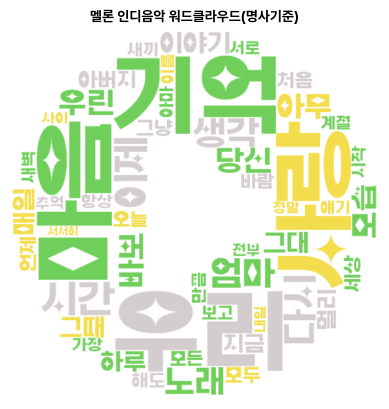

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
from PIL import Image
import matplotlib.font_manager as fm

# 폰트 파일 경로
font_path = '../01_data_모음/assets/fonts/WantedSans-Bold.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 마스크 이미지 가져오기 
mask_img = np.array(Image.open("../01_data_모음/assets/imgs/play-button.png"))


# 특정 색상 정의
highlight_color = (33, 205, 228) 
other_colors = [
    (112, 207, 90),   # rgb(112, 207, 90) 멜론
    (243, 221, 76),   #rgb(243, 221, 76) 카카오 
    (212, 205, 208),  # rgb(212, 205, 208) 회색 
    # (93, 149, 247),  # rgb(93, 149, 247) 지니 
    # (175, 43, 141),  # rgb(175, 43, 141) 벅스
    # (218, 72, 69),   # rgb(218, 72, 69) 벅스 
    # (235, 183, 68),  # rgb(235, 183, 68) 벅스 
]

# 강조할 단어 리스트
highlight_words = [""]

# 색상 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return f'rgb({highlight_color[0]}, {highlight_color[1]}, {highlight_color[2]})'
    else:
        # 다른 색상 중 하나를 랜덤하게 선택
        other_color = other_colors[np.random.randint(0, len(other_colors))]
        return f'rgb({other_color[0]}, {other_color[1]}, {other_color[2]})'

# 워드클라우드 생성
lightwordcloud = WordCloud(
    background_color='white',
    font_path="../01_data_모음/assets/fonts/Hakgyoansim Byeolbichhaneul TTF B.ttf",
    mask=mask_img,
    height=1000,
    color_func=color_func
).generate_from_frequencies(dict(pos_counter_most))

# 워드클라우드 시각화
plt.imshow(lightwordcloud, interpolation='bilinear')
plt.title("멜론 인디음악 워드클라우드(명사기준)", fontproperties=font_prop)
plt.axis("off")  # 축 필요 없음
plt.show()


#### 동사 + 형용사 기준 

In [38]:
# 문장의 "Verb", "Adjective" 인 리스트만 반환하는 함수 (okt 사용)
def collect_review_NVA (review) :
  pos_review = okt.pos(review)
  rt_noun_list = list()
  for word, pos in pos_review :
    if len(word) == 1 or word in stopwords :
      continue
    if pos in ["Verb", "Adjective"] :
      rt_noun_list.append(word)
  return rt_noun_list

In [39]:
# 형태소 리스트화 2
new_posdt2 = songs["lylics"].tolist()
pos_word_list2 = list()

for i in new_posdt2:
  pos_word_list2.extend(collect_review_NVA(regular_review(i)))

In [40]:
# 카운터 확인 2
pos_counter2 = Counter(pos_word_list2)
pos_counter_most2 = pos_counter2.most_common(50)
print(pos_counter2)

Counter({'나를': 4400, '하는': 2100, '없어': 1400, '있어': 1200, '버린': 1100, '괜찮아': 1100, '있는': 1100, '여전히': 1002, '싶어': 1000, '버려': 1000, '보면': 1000, '할게요': 902, '같은': 800, '같아': 800, '하지': 800, '없는': 800, '잖아': 700, '자요': 700, '찾아서': 700, '걸까': 602, '않은': 602, '따라': 600, '들어와': 600, '않아': 600, '작은': 600, '하면': 600, '몰라도': 600, '하네': 600, '터뜨려': 600, '살아가는': 600, '떠날래': 600, '같지': 600, '소중한': 500, '아닌': 500, '않을': 500, '잠겨': 500, '버리면': 500, '들어': 500, '아무렇지': 500, '피는': 500, '않아도': 500, '그런': 500, '해요': 500, '해야': 500, '모르겠어': 500, '듣는': 500, '불러도': 500, '높은': 500, '많은': 500, '멈춰': 500, '할게': 500, '날아가': 500, '봐도': 500, '있으면': 404, '있지': 401, '있던': 400, '있을까': 400, '나도': 400, '내리면': 400, '젖고': 400, '할까': 400, '알까': 400, '이끌려': 400, '했죠': 400, '하게': 400, '보니': 400, '떠올리면': 400, '고마워요': 400, '좋은': 400, '틀려도': 400, '좋아한': 400, '이었다면': 400, '바라봐': 400, '있잖아': 400, '채우고': 400, '되었어요': 400, '되니까': 400, '생각납니다': 400, '안아': 400, '망설이지': 400, '안긴': 400, '바라보는': 400, '비춰': 400, '같다고': 400, '많아': 400, 

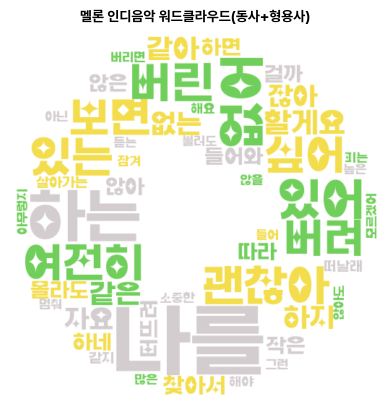

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
from PIL import Image
import matplotlib.font_manager as fm

# 폰트 파일 경로
font_path = '../01_data_모음/assets/fonts/WantedSans-Bold.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 마스크 이미지 가져오기 
mask_img = np.array(Image.open("../01_data_모음/assets/imgs/play-button.png"))


# 특정 색상 정의
highlight_color = (33, 205, 228) 
other_colors = [
    (112, 207, 90),   # rgb(112, 207, 90) 멜론
    (243, 221, 76),   #rgb(243, 221, 76) 카카오 
    (212, 205, 208),  # rgb(212, 205, 208) 회색 
    # (93, 149, 247),  # rgb(93, 149, 247) 지니 
    # (175, 43, 141),  # rgb(175, 43, 141) 벅스
    # (218, 72, 69),   # rgb(218, 72, 69) 벅스 
    # (235, 183, 68),  # rgb(235, 183, 68) 벅스 
]

# 강조할 단어 리스트
highlight_words = [""]

# 색상 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return f'rgb({highlight_color[0]}, {highlight_color[1]}, {highlight_color[2]})'
    else:
        # 다른 색상 중 하나를 랜덤하게 선택
        other_color = other_colors[np.random.randint(0, len(other_colors))]
        return f'rgb({other_color[0]}, {other_color[1]}, {other_color[2]})'

# 워드클라우드 생성
lightwordcloud = WordCloud(
    background_color='white',
    font_path="../01_data_모음/assets/fonts/Hakgyoansim Byeolbichhaneul TTF B.ttf",
    mask=mask_img,
    height=1000,
    color_func=color_func
).generate_from_frequencies(dict(pos_counter_most2))

# 워드클라우드 시각화
plt.imshow(lightwordcloud, interpolation='bilinear')
plt.title("멜론 인디음악 워드클라우드(동사+형용사)", fontproperties=font_prop)
plt.axis("off")  # 축 필요 없음
plt.show()


#### 명사 + 동사 + 형용사 기준 

In [50]:
# 문장의 "Noun", "Verb", "Adjective" 인 리스트만 반환하는 함수 (okt 사용)
def collect_review_NV (review) :
  pos_review = okt.pos(review)
  rt_noun_list = list()
  for word, pos in pos_review :
    if len(word) == 1 or word in stopwords :
      continue
    if pos in ["Noun", "Verb", "Adjective"] :
      rt_noun_list.append(word)
  return rt_noun_list

In [51]:
# 형태소 리스트화 3
new_posdt3 = songs["lylics"].tolist()
pos_word_list3 = list()

for i in new_posdt3:
  pos_word_list3.extend(collect_review_NV(regular_review(i)))

In [52]:
# 카운터 확인 3
pos_counter3 = Counter(pos_word_list3)
pos_counter_most3 = pos_counter3.most_common(50)
# print(pos_counter3)

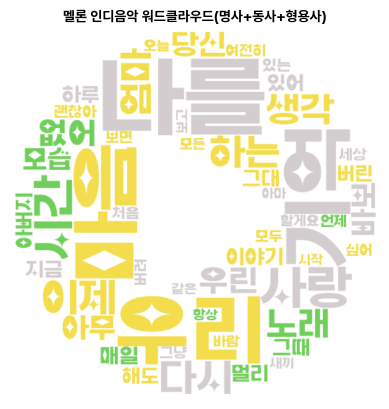

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
from PIL import Image
import matplotlib.font_manager as fm

# 폰트 파일 경로
font_path = '../01_data_모음/assets/fonts/WantedSans-Bold.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 마스크 이미지 가져오기 
mask_img = np.array(Image.open("../01_data_모음/assets/imgs/play-button.png"))


# 특정 색상 정의
highlight_color = (33, 205, 228) 
other_colors = [
    (112, 207, 90),   # rgb(112, 207, 90) 멜론
    (243, 221, 76),   #rgb(243, 221, 76) 카카오 
    (212, 205, 208),  # rgb(212, 205, 208) 회색 
    # (93, 149, 247),  # rgb(93, 149, 247) 지니 
    # (175, 43, 141),  # rgb(175, 43, 141) 벅스
    # (218, 72, 69),   # rgb(218, 72, 69) 벅스 
    # (235, 183, 68),  # rgb(235, 183, 68) 벅스 
]

# 강조할 단어 리스트
highlight_words = [""]

# 색상 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return f'rgb({highlight_color[0]}, {highlight_color[1]}, {highlight_color[2]})'
    else:
        # 다른 색상 중 하나를 랜덤하게 선택
        other_color = other_colors[np.random.randint(0, len(other_colors))]
        return f'rgb({other_color[0]}, {other_color[1]}, {other_color[2]})'

# 워드클라우드 생성
lightwordcloud = WordCloud(
    background_color='white',
    font_path="../01_data_모음/assets/fonts/Hakgyoansim Byeolbichhaneul TTF B.ttf",
    mask=mask_img,
    height=1000,
    color_func=color_func
).generate_from_frequencies(dict(pos_counter_most3))

# 워드클라우드 시각화
plt.imshow(lightwordcloud, interpolation='bilinear')
plt.title("멜론 인디음악 워드클라우드(명사+동사+형용사)", fontproperties=font_prop)
plt.axis("off")  # 축 필요 없음
plt.show()
